# Основы визуализации данных с помощью Matplotlib

Домашнее задание

### Цель домашнего задания
Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных

Описание домашнего задания и формат сдачи
Вам предстоит выполнить задачи по визуализации данных. Для этого впишите свой код в ячейки после комментария ### YOUR CODE HERE ### и сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

### Важно учесть: У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

## Описание данных

Для выполнения домашнего задания необходимо использовать датасет vgsales.csv, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:

♦ Rank - порядковый номер записи в датасете

♦ Name - наименование игры

♦ Platform - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)

♦ Year - год выпуска игры

♦ Genre - жанр игры

♦ Publisher - наименование компании-издателя игры

♦ NA_Sales - объем продаж игры в Северной Америке, млн. копий

♦ EU_Sales - объем продаж игры в Европе, млн. копий

♦ JP_Sales - объем продаж игры в Японии, млн. копий

♦ Other_Sales - объем продаж игры в остальных странах, млн. копий

♦ Global_Sales - объем продаж игры по всему миру, млн. копий


### Критерии оценки

"Зачет" - выполнены задачи 1-9, каждый график отформатирован и читаем

"На доработку" - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

Рекомендации по выполнению
Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии

In [5]:
serias =df.dropna().set_index('Year').sort_index()['JP_Sales']

In [6]:
serias.max()

10.22

In [34]:
S = df['JP_Sales']
S

0         3.77
1         6.81
2         3.79
3         3.28
4        10.22
         ...  
16593     0.00
16594     0.00
16595     0.00
16596     0.00
16597     0.00
Name: JP_Sales, Length: 16598, dtype: float64

Text(0, 0.5, 'Записей')

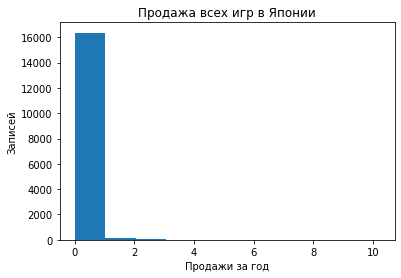

In [35]:
plt.hist(S)
plt.title('Продажа всех игр в Японии')
plt.xlabel('Продажи за год')
plt.ylabel('Записей')

Text(0, 0.5, '# записей')

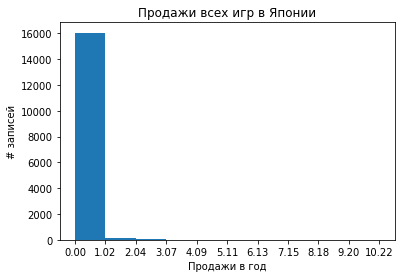

In [10]:
X = serias.max() / 10
X_range = [i * X for i in range(11)]
plt.hist(serias)
plt.xticks(X_range)
plt.title('Продажи всех игр в Японии')
plt.xlabel('Продажи в год')
plt.ylabel('# записей')

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

In [6]:
F = df[df['Name']=='Grand Theft Auto V'].groupby('Platform')['Global_Sales'].sum()

In [7]:
F = F.sort_values(ascending=False).reset_index()

Text(0, 0.5, 'Обьем продаж')

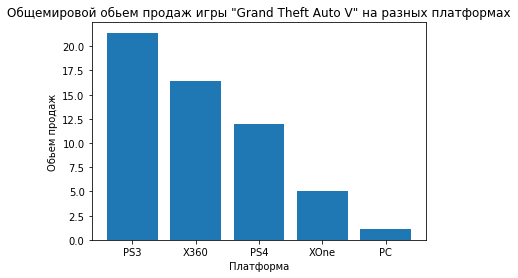

In [8]:
plt.bar(F['Platform'],F['Global_Sales'])
plt.title('Общемировой обьем продаж игры "Grand Theft Auto V" на разных платформах')
plt.xlabel('Платформа')
plt.ylabel('Обьем продаж')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

In [9]:
G = df.groupby('Year')['Global_Sales'].sum() # Продажи по годам всех игр

Text(0, 0.5, 'Продажи')

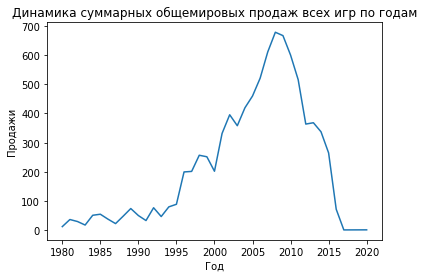

In [10]:
plt.plot(G)
plt.title('Динамика суммарных общемировых продаж всех игр по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')

### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

Text(0, 0.5, 'Продажи в мире')

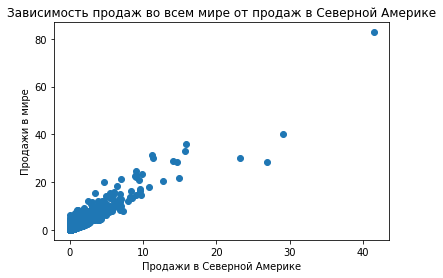

In [11]:
plt.scatter(df['NA_Sales'],df['Global_Sales'])
plt.title('Зависимость продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Продажи в Северной Америке')
plt.ylabel('Продажи в мире')

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

In [12]:
SMB = df[df['Name']=='Super Mario Bros.'].groupby('Platform')['Global_Sales'].sum()

([<matplotlib.patches.Wedge at 0x1ff7e0e6248>,
 [Text(1.0327312553050099, 0.3787692626337815, 'GB'),
  Text(-1.0327312198420677, -0.37876935932505823, 'NES')],
 [Text(0.5633079574390962, 0.20660141598206264, '11.2%'),
  Text(-0.5633079380956733, -0.206601468722759, '88.8%')])

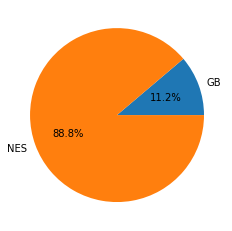

In [13]:
plt.pie(SMB,labels=SMB.index,autopct='%1.1f%%')

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

In [14]:
Five = df[df['Year']==2013].groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(5).reset_index()
Five

,Name,Global_Sales
0,Grand Theft Auto V,37.78
1,Call of Duty: Ghosts,27.38
2,FIFA 14,17.14
3,Pokemon X/Pokemon Y,14.35
4,Battlefield 4,14.03


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

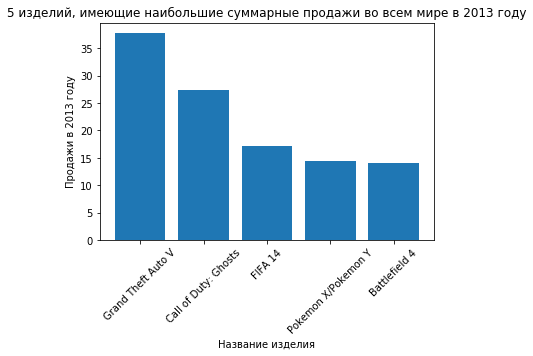

In [15]:
plt.bar(Five['Name'],Five['Global_Sales'])
plt.title('5 изделий, имеющие наибольшие суммарные продажи во всем мире в 2013 году')
plt.xlabel('Название изделия')
plt.ylabel('Продажи в 2013 году')
plt.xticks(rotation = 45)

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

In [28]:
GNENint = df[(df['Publisher'] != 'Nintendo') & (2000 <= df['Year']) &(df['Year'] <= 2015)].groupby('Publisher')['Global_Sales'].sum().reset_index()

([<matplotlib.axis.XTick at 0x1ff06096e48>,
 <a list of 21 Text xticklabel objects>)

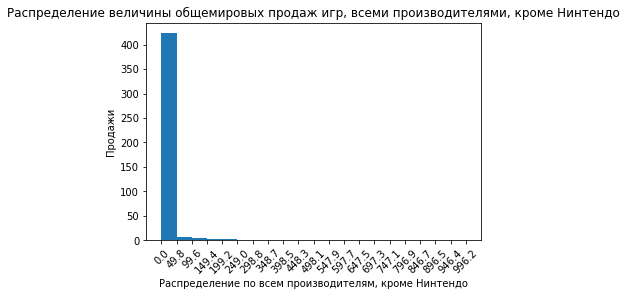

In [30]:
plt.hist(GNENint['Global_Sales'], bins= 20)
plt.title('Распределение величины общемировых продаж игр, всеми производителями, кроме Нинтендо')
plt.xlabel('Распределение по всем производителям, кроме Нинтендо')
plt.ylabel('Продажи')
X = GNENint['Global_Sales'].max() / 20
X_range = [i * X for i in range (21)]
plt.xticks(X_range, rotation = 45)

### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

In [40]:
ACTION = df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].sum()


In [47]:
X_rang = list(range(int(ACTION.index.min()), int(ACTION.index.max())+1, 10))
X_rang.append(int(ACTION.index.max()))

([<matplotlib.axis.XTick at 0x1ff059e7bc8>,
 <a list of 5 Text xticklabel objects>)

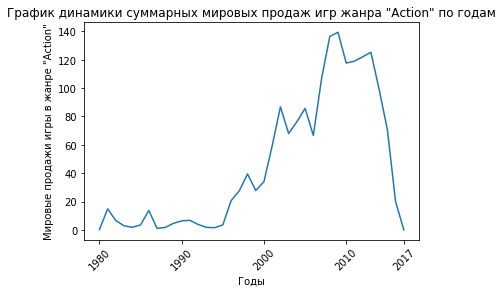

In [48]:
plt.plot(ACTION)
plt.title('График динамики суммарных мировых продаж игр жанра "Action" по годам')
plt.xlabel('Годы')
plt.ylabel('Мировые продажи игры в жанре "Action"')
plt.xticks(X_rang, rotation = 45)

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

In [49]:
FINISH = df[df['Publisher']=='Microsoft Game Studios'].groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).reset_index()

In [50]:
FINISH

,Genre,NA_Sales
0,Shooter,64.65
1,Misc,30.61
2,Racing,16.83
3,Role-Playing,12.79
4,Sports,9.69
5,Action,8.09
6,Simulation,7.10
7,Strategy,1.81
8,Fighting,1.68
9,Adventure,1.09


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

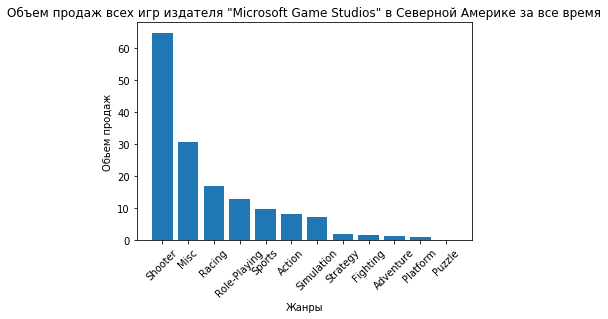

In [52]:
plt.bar(FINISH['Genre'], FINISH['NA_Sales'])
plt.title('Объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время')
plt.xlabel('Жанры')
plt.ylabel('Обьем продаж')
plt.xticks(rotation = 45)